In [14]:
import os
import json
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj=SentimentIntensityAnalyzer()
DATA_DIR = 'data/'

In [37]:
all_data=[]
files=['Amazon.txt','Microsoft.txt']
for file in files:
    with open(DATA_DIR+file,encoding='utf-8') as f:
        for line in f:
            data=json.loads(line)
            data['rating']=float(data['rating'])
            data['company']=file.replace('.txt','')
            data['datePosted']=datetime.strptime(data['authorInfo'].split('-')[0].strip(),'%d %b %Y')
            data['authorProfession']=data['authorInfo'].split('-')[1].strip()
            data['CurrentOrFormer']=''
            if 'Current' in data['employeeStatus']:
                data['CurrentOrFormer']='Current'
            if 'Former' in data['employeeStatus']:
                data['CurrentOrFormer']='Former'
            all_data.append(data)
df=pd.DataFrame(all_data)
print(df.shape)
df.head()

(87059, 11)


,rating,employeeStatus,pros,cons,adviceManagement,authorInfo,authorLocation,company,datePosted,authorProfession,CurrentOrFormer
0,5.0,"Current Employee, more than 1 year","Fair, effective, great benefits, opportunities...","high demand, long hours, competitive",,29 Jun 2021 - Human Resources Coordinator (HR ...,,Amazon,2021-06-29,Human Resources Coordinator (HR Coordinator),Current
1,4.0,Current Employee,"professional , great pay , well trained , good...","stressful , pip , x,y,z",,17 Jul 2021 - Full Stack Developer,Hong Kong,Amazon,2021-07-17,Full Stack Developer,Current
2,4.0,"Former Employee, less than 1 year","Good environment, Nice fellows, and good oppor...",Not so many disadvantages and you could learn ...,,7 Jul 2021 - Software Development Engineer (SDE),Hong Kong,Amazon,2021-07-07,Software Development Engineer (SDE),Former
3,3.0,Current Employee,Challenging\r\nLots to learn business wise and...,Non people oriented\r\nFrequent talent loss,,29 Jun 2021 - Anonymous Employee,,Amazon,2021-06-29,Anonymous Employee,Current
4,5.0,Current Employee,big firm; good pay; many growth opportunities.,the workload is sometimes high,,22 May 2021 - Anonymous Employee,,Amazon,2021-05-22,Anonymous Employee,Current


In [38]:
df.pivot_table(index='company',columns=['CurrentOrFormer'],values='rating',aggfunc='count')

CurrentOrFormer,Current,Former
company,,
Amazon,41260,21529
Microsoft,15894,8376


In [39]:
def apply_sentiment(text):
    sentiment_dict=sid_obj.polarity_scores(text)
    return sentiment_dict['compound']

def search_reviews(sWords, matchPhrase=True, ignoreCase=True):
    if matchPhrase==False:
        sWords='|'.join([word for word in sWords.split()])
    df_subset=df[(df['pros'].str.contains(sWords,case=ignoreCase)==True)|(df['cons'].str.contains(sWords,case=ignoreCase)==True)]
    return df_subset

In [40]:
df['proSentiment']=df['pros'].apply(lambda x:apply_sentiment(x))
df['conSentiment']=df['cons'].apply(lambda x:apply_sentiment(x))
df.head()

,rating,employeeStatus,pros,cons,adviceManagement,authorInfo,authorLocation,company,datePosted,authorProfession,CurrentOrFormer,proSentiment,conSentiment
0,5.0,"Current Employee, more than 1 year","Fair, effective, great benefits, opportunities...","high demand, long hours, competitive",,29 Jun 2021 - Human Resources Coordinator (HR ...,,Amazon,2021-06-29,Human Resources Coordinator (HR Coordinator),Current,0.9287,0.0516
1,4.0,Current Employee,"professional , great pay , well trained , good...","stressful , pip , x,y,z",,17 Jul 2021 - Full Stack Developer,Hong Kong,Amazon,2021-07-17,Full Stack Developer,Current,0.8271,-0.5106
2,4.0,"Former Employee, less than 1 year","Good environment, Nice fellows, and good oppor...",Not so many disadvantages and you could learn ...,,7 Jul 2021 - Software Development Engineer (SDE),Hong Kong,Amazon,2021-07-07,Software Development Engineer (SDE),Former,0.8807,0.3536
3,3.0,Current Employee,Challenging\r\nLots to learn business wise and...,Non people oriented\r\nFrequent talent loss,,29 Jun 2021 - Anonymous Employee,,Amazon,2021-06-29,Anonymous Employee,Current,0.5719,0.1280
4,5.0,Current Employee,big firm; good pay; many growth opportunities.,the workload is sometimes high,,22 May 2021 - Anonymous Employee,,Amazon,2021-05-22,Anonymous Employee,Current,0.7717,0.0000


In [29]:
df['proSentiment'].describe()

count    87059.000000
mean         0.590212
std          0.322649
min         -0.968200
25%          0.421500
50%          0.670500
75%          0.844200
max          0.999700
Name: proSentiment, dtype: float64

In [30]:
df['conSentiment'].describe()

count    87059.000000
mean        -0.039956
std          0.417586
min         -0.996000
25%         -0.318200
50%          0.000000
75%          0.196800
max          0.999500
Name: conSentiment, dtype: float64

In [31]:
word_dict={'racial': 1,
 'fairness': 1,
 'discrimination': 1,
 'privacy': 1,
 'compliance': 1,
 'stuffed': 1,
 'predominantly': 1,
 'spanish': 1,
 'submissive': 1,
 'pan': 1,
 'male': 1,
 'chinese': 1,
 'elite': 1,
 'australian': 1,
 'pms': 1,
 'badges': 1,
 'men': 1,
 'golden': 1,
 'males': 1,
 'female': 1,
 'veteran': 1,
 'white': 1,
 'seasoned': 1,
 'incapable': 1,
 'minorities': 1,
 'emea': 1,
 'blr': 1,
 'fortress': 1,
 'otc': 1,
 'inclusion': 1,
 'teamwork': 1,
 'empowerment': 1,
 'transparency': 1,
 'professionalism': 1,
 'awards': 1,
 'valuation': 1,
 'grants': 1,
 'backloaded': 1,
 'offerings': 1,
 'openness': 1,
 'diversity': 1,
 'cultural': 1,
 'inexcusable': 1,
 'investigators': 1,
 'slowest': 1,
 'hightech': 1,
 'beauty': 1,
 'brilliance': 1,
 'honesty': 1,
 'sexism': 1,
 'payroll': 1,
 'messaging': 1,
 'piss-poor': 1}
len(word_dict)

53

In [41]:
word_dict=['racism',
'agism',
'sexist',
'bias',
'salary',
'favouritism',
'nepotism',
'backstabbing',
'sexism',
'partiality',
'racism',
'micromanagement',
'favouritism',
'politics',
'bureaucracy',
'pay',
'wlb',
'discrimination']

In [53]:
mywords=" ".join([w for w in word_dict if 'pay' not in w])
df_temp=search_reviews(mywords,False)
df_temp.shape

(8615, 13)

In [52]:
word_usage=[]
for word in word_dict:
    df_pro=df[df['pros'].str.contains(word,case=True)==True]
    proUsage=df_pro.shape[0]
    proRating=df_pro['rating'].mean()
    proSentiment=df_pro['proSentiment'].mean()
    df_con=df[df['cons'].str.contains(word,case=True)==True]
    conUsage=df_con.shape[0]
    conRating=df_con['rating'].mean()
    conSentiment=df_con['conSentiment'].mean()
    #word_usage.append((word,proUsage,proRating,proSentiment,conUsage,conRating,conSentiment))
    word_usage.append((word,proUsage,conUsage))
word_usage

[('racism', 1, 39),
 ('agism', 0, 0),
 ('sexist', 0, 28),
 ('bias', 69, 293),
 ('salary', 3186, 1664),
 ('favouritism', 1, 58),
 ('nepotism', 1, 57),
 ('backstabbing', 3, 91),
 ('sexism', 0, 15),
 ('partiality', 2, 32),
 ('racism', 1, 39),
 ('micromanagement', 41, 113),
 ('favouritism', 1, 58),
 ('politics', 244, 2488),
 ('bureaucracy', 92, 622),
 ('pay', 11365, 3754),
 ('wlb', 39, 37),
 ('discrimination', 19, 81)]

In [35]:
df_temp=search_reviews('sexist')
df_tempone

NameError: name 'df_tempone' is not defined

In [56]:
sample_size=10
temp=df_temp.sample(sample_size)
for i in range(sample_size):
    print(temp.iloc[i]['cons'])
    print('____________________________________________')

Back stabbing, deceit, racist, sexist culture. Most devious and self promoting engineers win. If you want to do good engineering work then go somewhere else. If you love politics and outsmarting your peers then this is the place for you.
____________________________________________
Unwilling to work with their associates and show compassion, especially in the face of COVID-19. As a woman in her 20s, I faced sexist and condescending remarks from select male superiors.
____________________________________________
As for the insurance benefits, for a company the size of Amazon.com, and with as many subsidiaries that they own, they should have been able to hire someone who could have negotiated a much better deal for their group insurance rates for anyone with a family.  I've worked at smaller employers, with nowhere near the employee capital leverage that Amazon.com can command, and they provided much better insurance for families or Parents w/children, at much lower rates.
again, as long

In [56]:
df1=df.pivot_table(index='company',values='rating',aggfunc='count')
df2=df.pivot_table(index='company',values='rating',aggfunc=np.mean)
df3=df.pivot_table(index='company',values='proSentiment',aggfunc=np.mean)
df4=df.pivot_table(index='company',values='conSentiment',aggfunc=np.mean)

df_temp=df[df['CurrentOrFormer']=='Current'].copy()
df5=df_temp.pivot_table(index='company',values='rating',aggfunc='count')
df6=df_temp.pivot_table(index='company',values='rating',aggfunc=np.mean)
df7=df_temp.pivot_table(index='company',values='proSentiment',aggfunc=np.mean)
df8=df_temp.pivot_table(index='company',values='conSentiment',aggfunc=np.mean)

df_temp=df[df['CurrentOrFormer']=='Former'].copy()
df9=df_temp.pivot_table(index='company',values='rating',aggfunc='count')
df10=df_temp.pivot_table(index='company',values='rating',aggfunc=np.mean)
df11=df_temp.pivot_table(index='company',values='proSentiment',aggfunc=np.mean)
df12=df_temp.pivot_table(index='company',values='conSentiment',aggfunc=np.mean)

mywords=" ".join([w for w in word_dict if 'pay' not in w])
df_temp=search_reviews(mywords,False)
df13=df_temp.pivot_table(index='company',values='rating',aggfunc='count')
df14=df_temp.pivot_table(index='company',values='rating',aggfunc=np.mean)
df15=df_temp.pivot_table(index='company',values='proSentiment',aggfunc=np.mean)
df16=df_temp.pivot_table(index='company',values='conSentiment',aggfunc=np.mean)

print(mywords)
df_summary=pd.concat((df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,df13,df14,df15,df16), axis=1)
df_summary.columns=['countTotal','ratingTotal','proSentimentTotal','conSentimentTotal',
                            'countCurrent','ratingCurrent','proSentimentCurrent','conSentimentCurrent',
                            'countFormer','ratingFormer','proSentimentFormer','conSentimentFormer',
                   'countWords','ratingWords','proSemtimentWords','conSentimentWords']
df_summary.T

racism agism sexist bias salary favouritism nepotism backstabbing sexism partiality racism micromanagement favouritism politics bureaucracy wlb discrimination


company,Amazon,Microsoft
countTotal,62789.000000,24270.000000
ratingTotal,3.712466,4.047301
proSentimentTotal,0.550838,0.692076
conSentimentTotal,-0.061352,0.015399
countCurrent,41260.000000,15894.000000
ratingCurrent,3.897625,4.151755
proSentimentCurrent,0.567120,0.687472
conSentimentCurrent,-0.043094,0.017877
countFormer,21529.000000,8376.000000
ratingFormer,3.357611,3.849093


In [54]:
df_temp.head()

,rating,employeeStatus,pros,cons,adviceManagement,authorInfo,authorLocation,company,datePosted,authorProfession,CurrentOrFormer,proSentiment,conSentiment
33,5.0,Current Employee,hello I just want to check the salary,But I am not working for servicenow now. just ...,,25 Apr 2019 - Anonymous Employee,,Amazon,2019-04-25,Anonymous Employee,Current,0.0772,0.0000
37,4.0,Former Employee,"Positive company culture, work-life balance.","Some departments have a bureaucracy, the team ...",,15 Mar 2017 - Anonymous Employee,,Amazon,2017-03-15,Anonymous Employee,Former,0.5574,-0.3412
41,4.0,Current Employee,Disclaimer: My opinions reflect that of an SDE...,Beware of bad managers and horrible team mates...,,19 Sep 2014 - Software Development Engineer,"Seattle, WA",Amazon,2014-09-19,Software Development Engineer,Current,0.9991,-0.7085
63,1.0,"Current Employee, less than 1 year","1) The total comp ""could"" be great. \n2) Lots ...",As a consultant: \n\n1) No Trainings - They al...,,1 Jul 2021 - Principal Consultant,,Amazon,2021-07-01,Principal Consultant,Current,0.7845,-0.8246
69,5.0,Current Employee,"vibrant, fast paced culture\r\n- smart, fun, a...",Worse still is the politics. When you hire a b...,,6 Apr 2015 -,,Amazon,2015-04-06,,Current,0.9628,0.4201


<AxesSubplot:>

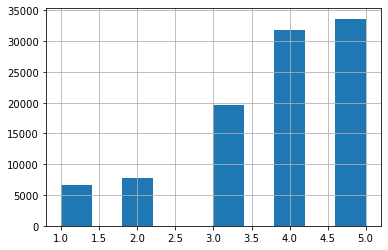

In [47]:
df['rating'].hist()

<AxesSubplot:>

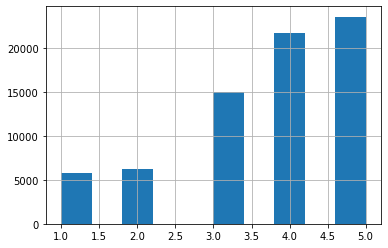

In [46]:
df_amazon['rating'].hist()

<AxesSubplot:>

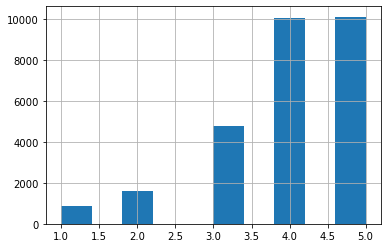

In [45]:
df_microsoft['rating'].hist()

In [61]:
print(df_microsoft['rating'].mean())
print(df_microsoft['proSentiment'].mean())
print(df_microsoft['conSentiment'].mean())

3.984346999231979
0.6788369052408143
0.0068447207694833576


In [60]:
print(df_amazon['rating'].mean())
print(df_amazon['proSentiment'].mean())
print(df_amazon['conSentiment'].mean())

3.707284309652403
0.5510070821215838
-0.0613374615704134
